# Instalaci√≥n e Importaciones de Paquetes necesarios

In [ ]:
import subprocess
import sys

def install_package(package):
    """Instala un paquete usando pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} instalado exitosamente")
    except subprocess.CalledProcessError as e:
        print(f"Error instalando {package}: {e}")

# Lista de paquetes requeridos
packages = [
    "transformers>=4.21.0",      # Librer√≠a para trabajar con modelos transformer
    "torch>=1.12.0",             # PyTorch - framework de deep learning
    "datasets>=2.0.0",           # Manejo de datasets para ML
    "scikit-learn>=1.1.0",       # Herramientas de machine learning
    "matplotlib>=3.5.0",         # Visualizaci√≥n de datos
    "seaborn>=0.11.0",           # Visualizaci√≥n estad√≠stica
    "pandas>=1.4.0",             # An√°lisis de datos tabulares
    "numpy>=1.21.0",             # Operaciones num√©ricas
    "tqdm>=4.64.0",              # Barras de progreso
    "tree-sitter>=0.20.0",       # Parseo de c√≥digo para AST
    "networkx>=2.8.0",           # Manejo de grafos (para GraphCodeBERT)
    "plotly>=5.0.0"              # Visualizaciones interactivas
]

print("Iniciando instalaci√≥n de dependencias...")
for package in packages:
    install_package(package)

print("\nInstalaci√≥n completada!")

Iniciando instalaci√≥n de dependencias...
transformers>=4.21.0 instalado exitosamente
torch>=1.12.0 instalado exitosamente
datasets>=2.0.0 instalado exitosamente
scikit-learn>=1.1.0 instalado exitosamente
matplotlib>=3.5.0 instalado exitosamente
seaborn>=0.11.0 instalado exitosamente
pandas>=1.4.0 instalado exitosamente
numpy>=1.21.0 instalado exitosamente
tqdm>=4.64.0 instalado exitosamente
tree-sitter>=0.20.0 instalado exitosamente
networkx>=2.8.0 instalado exitosamente
plotly>=5.0.0 instalado exitosamente

Instalaci√≥n completada!


In [ ]:
# Importaciones y configuraci√≥n b√°sica del entorno

# Importaciones principales
import os
import re
import ast
import json
import warnings
from typing import List, Dict, Tuple, Optional
from dataclasses import dataclass
from pathlib import Path

# Deep Learning y ML
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    RobertaTokenizer, RobertaModel, RobertaConfig,
    Trainer, TrainingArguments
)

# An√°lisis de datos y visualizaci√≥n
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilidades
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import networkx as nx

# Configuraci√≥n
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configuraci√≥n de dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Dispositivo utilizado: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")

# Configuraci√≥n de semilla para reproducibilidad
torch.manual_seed(42)
np.random.seed(42)

print("Configuraci√≥n inicial completada!")

Dispositivo utilizado: cuda
GPU: Tesla T4
Memoria GPU: 14.74 GB
Configuraci√≥n inicial completada!


# Comparativa de Modelos

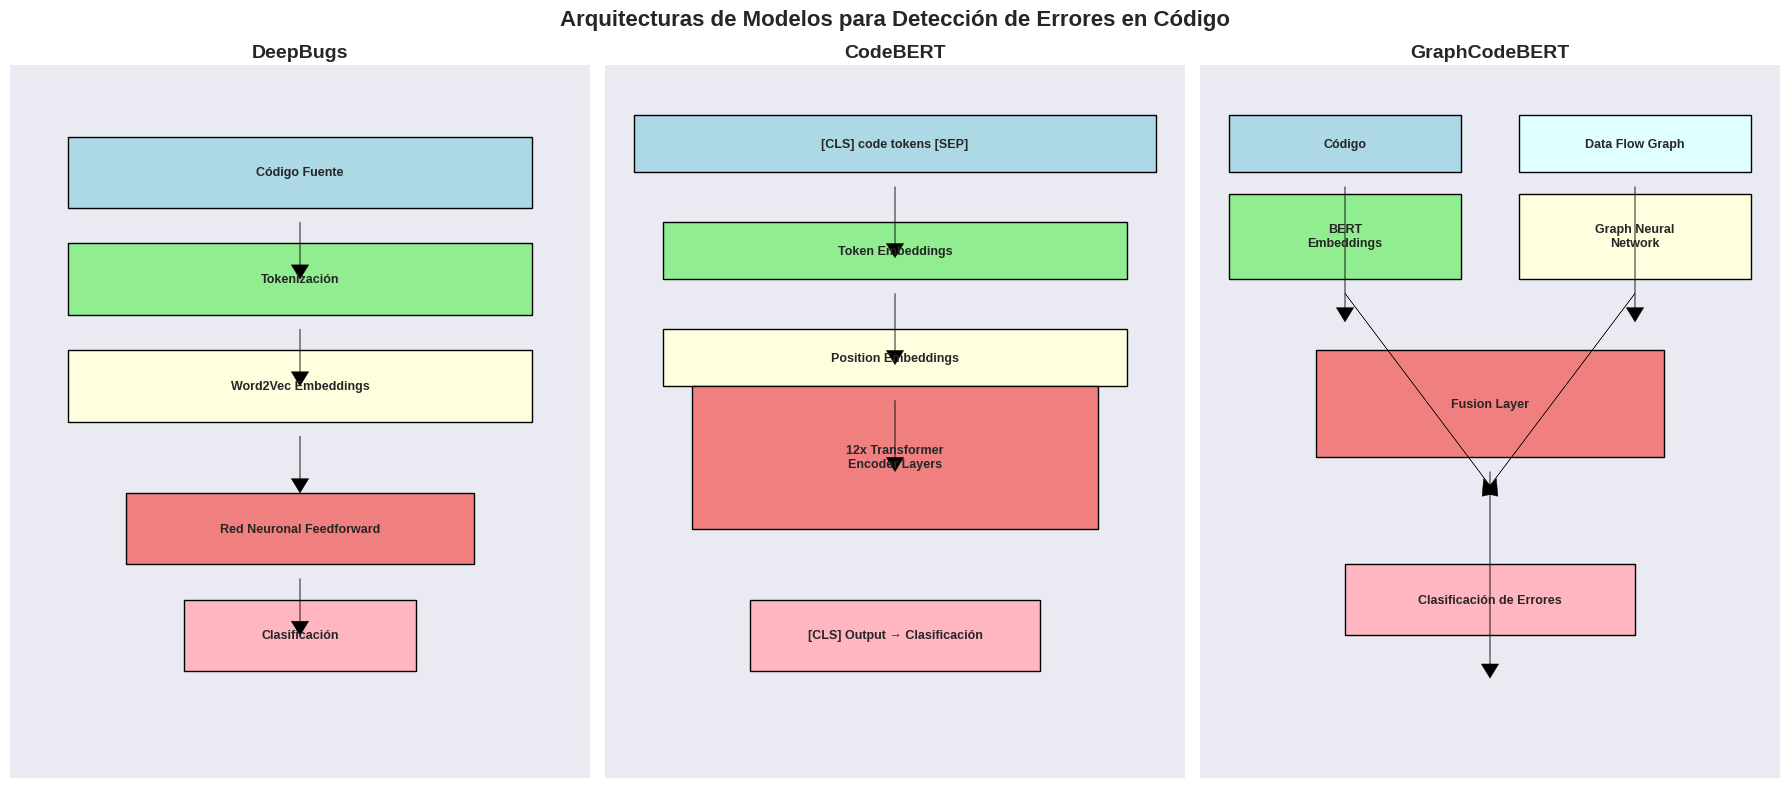


üìä Comparaci√≥n de Modelos:


Modelo Arquitectura Base    Pre-entrenamiento  \
0       DeepBugs    Feedforward NN                   No   
1       CodeBERT  BERT Transformer  S√≠ (2.1M funciones)   
2  GraphCodeBERT        BERT + GNN       S√≠ + Data Flow   

  Comprensi√≥n Estructural Par√°metros   A√±o  
0                  B√°sica        ~1M  2018  
1                   Buena       125M  2020  
2               Excelente      125M+  2021

In [ ]:
# Visualizaci√≥n de las arquitecturas de los modelos
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd

# Crear figura y subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Arquitecturas de Modelos para Detecci√≥n de Errores en C√≥digo', fontsize=16, fontweight='bold')

# DeepBugs Architecture
ax1 = axes[0]
ax1.set_title('DeepBugs', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)

# Dibujo DeepBugs architecture
boxes_deepbugs = [
    {'xy': (1, 8), 'width': 8, 'height': 1, 'label': 'C√≥digo Fuente', 'color': 'lightblue'},
    {'xy': (1, 6.5), 'width': 8, 'height': 1, 'label': 'Tokenizaci√≥n', 'color': 'lightgreen'},
    {'xy': (1, 5), 'width': 8, 'height': 1, 'label': 'Word2Vec Embeddings', 'color': 'lightyellow'},
    {'xy': (2, 3), 'width': 6, 'height': 1, 'label': 'Red Neuronal Feedforward', 'color': 'lightcoral'},
    {'xy': (3, 1.5), 'width': 4, 'height': 1, 'label': 'Clasificaci√≥n', 'color': 'lightpink'}
]

for box in boxes_deepbugs:
    rect = patches.Rectangle(box['xy'], box['width'], box['height'],
                           linewidth=1, edgecolor='black', facecolor=box['color'])
    ax1.add_patch(rect)
    ax1.text(box['xy'][0] + box['width']/2, box['xy'][1] + box['height']/2,
            box['label'], ha='center', va='center', fontsize=9, fontweight='bold')

# Dibujar las flechas
arrows_deepbugs = [(5, 8), (5, 6.5), (5, 5), (5, 3), (5, 1.5)]
for i in range(len(arrows_deepbugs)-1):
    ax1.arrow(arrows_deepbugs[i][0], arrows_deepbugs[i][1]-0.2, 0, -0.6,
             head_width=0.3, head_length=0.2, fc='black', ec='black')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# CodeBERT Architecture
ax2 = axes[1]
ax2.set_title('CodeBERT', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)

boxes_codebert = [
    {'xy': (0.5, 8.5), 'width': 9, 'height': 0.8, 'label': '[CLS] code tokens [SEP]', 'color': 'lightblue'},
    {'xy': (1, 7), 'width': 8, 'height': 0.8, 'label': 'Token Embeddings', 'color': 'lightgreen'},
    {'xy': (1, 5.5), 'width': 8, 'height': 0.8, 'label': 'Position Embeddings', 'color': 'lightyellow'},
    {'xy': (1.5, 3.5), 'width': 7, 'height': 2, 'label': '12x Transformer\nEncoder Layers', 'color': 'lightcoral'},
    {'xy': (2.5, 1.5), 'width': 5, 'height': 1, 'label': '[CLS] Output ‚Üí Clasificaci√≥n', 'color': 'lightpink'}
]

for box in boxes_codebert:
    rect = patches.Rectangle(box['xy'], box['width'], box['height'],
                           linewidth=1, edgecolor='black', facecolor=box['color'])
    ax2.add_patch(rect)
    ax2.text(box['xy'][0] + box['width']/2, box['xy'][1] + box['height']/2,
            box['label'], ha='center', va='center', fontsize=9, fontweight='bold')

# Dibujar las flechas
arrows_codebert = [(5, 8.5), (5, 7), (5, 5.5), (5, 3.5)]
for i in range(len(arrows_codebert)-1):
    ax2.arrow(arrows_codebert[i][0], arrows_codebert[i][1]-0.2, 0, -0.8,
             head_width=0.3, head_length=0.2, fc='black', ec='black')

ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

# GraphCodeBERT Architecture
ax3 = axes[2]
ax3.set_title('GraphCodeBERT', fontsize=14, fontweight='bold')
ax3.set_xlim(0, 10)
ax3.set_ylim(0, 10)

boxes_graphbert = [
    {'xy': (0.5, 8.5), 'width': 4, 'height': 0.8, 'label': 'C√≥digo', 'color': 'lightblue'},
    {'xy': (5.5, 8.5), 'width': 4, 'height': 0.8, 'label': 'Data Flow Graph', 'color': 'lightcyan'},
    {'xy': (0.5, 7), 'width': 4, 'height': 1.2, 'label': 'BERT\nEmbeddings', 'color': 'lightgreen'},
    {'xy': (5.5, 7), 'width': 4, 'height': 1.2, 'label': 'Graph Neural\nNetwork', 'color': 'lightyellow'},
    {'xy': (2, 4.5), 'width': 6, 'height': 1.5, 'label': 'Fusion Layer', 'color': 'lightcoral'},
    {'xy': (2.5, 2), 'width': 5, 'height': 1, 'label': 'Clasificaci√≥n de Errores', 'color': 'lightpink'}
]

for box in boxes_graphbert:
    rect = patches.Rectangle(box['xy'], box['width'], box['height'],
                           linewidth=1, edgecolor='black', facecolor=box['color'])
    ax3.add_patch(rect)
    ax3.text(box['xy'][0] + box['width']/2, box['xy'][1] + box['height']/2,
            box['label'], ha='center', va='center', fontsize=9, fontweight='bold')

# Dibujar las flechas
arrows_graphbert_1 = [(2.5, 8.5), (2.5, 7)]
arrows_graphbert_2 = [(7.5, 8.5), (7.5, 7)]
arrows_graphbert_3 = [(2.5, 7), (5, 4.5)]
arrows_graphbert_4 = [(7.5, 7), (5, 4.5)]
arrows_graphbert_5 = [(5, 4.5), (5, 2)]

for arrows in [arrows_graphbert_1, arrows_graphbert_2, arrows_graphbert_3,
               arrows_graphbert_4, arrows_graphbert_5]:
    for i in range(len(arrows)-1):
        dx = arrows[i+1][0] - arrows[i][0]
        dy = arrows[i+1][1] - arrows[i][1]
        ax3.arrow(arrows[i][0], arrows[i][1]-0.2, dx, dy-0.2,
                 head_width=0.3, head_length=0.2, fc='black', ec='black')

ax3.set_xticks([])
ax3.set_yticks([])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Comparaci√≥n de caracter√≠sticas de los modelos
comparison_data = {
    'Modelo': ['DeepBugs', 'CodeBERT', 'GraphCodeBERT'],
    'Arquitectura Base': ['Feedforward NN', 'BERT Transformer', 'BERT + GNN'],
    'Pre-entrenamiento': ['No', 'S√≠ (2.1M funciones)', 'S√≠ + Data Flow'],
    'Comprensi√≥n Estructural': ['B√°sica', 'Buena', 'Excelente'],
    'Par√°metros': ['~1M', '125M', '125M+'],
    'A√±o': ['2018', '2020', '2021']
}

df_comparison = pd.DataFrame(comparison_data)
print("\nüìä Comparaci√≥n de Modelos:")
print("="*50)
display(df_comparison)

#Implementaci√≥n Pr√°ctica en Python de los 3 modelos: DeepBugs, CodeBERT y GraphCodeBERT

In [ ]:
from dataclasses import dataclass
from typing import Dict, List
import torch
from transformers import AutoModel, AutoTokenizer

# 4.2 Clase base para detecci√≥n de errores
@dataclass
class CodeError:
    """Clase para representar un error detectado en c√≥digo"""
    line_number: int
    column: int
    error_type: str
    description: str
    suggestion: str
    confidence: float
    context: str

class CodeErrorDetector:
    """Clase base para detectores de errores en c√≥digo"""

    def __init__(self, model_name: str = "microsoft/codebert-base"):
        self.model_name = model_name
        self.tokenizer = None
        self.model = None
        self.device = device
        self.setup_model()

    def setup_model(self):
        """Configura el modelo y tokenizer"""
        print(f"üîß Configurando modelo: {self.model_name}")
        try:
            self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
            self.model = AutoModel.from_pretrained(self.model_name)
            self.model.to(self.device)
            self.model.eval()
            print("Modelo configurado exitosamente")
        except Exception as e:
            print(f"Error configurando modelo: {e}")

    def preprocess_code(self, code: str) -> Dict:
        """Preprocesa el c√≥digo para el modelo"""
        try:
            # Tokenizar el c√≥digo
            tokens = self.tokenizer(
                code,
                return_tensors="pt",
                max_length=512,
                truncation=True,
                padding=True
            )
            return {k: v.to(self.device) for k, v in tokens.items()}
        except Exception as e:
            print(f"Error en preprocessing: {e}")
            return {}

    def extract_features(self, code: str) -> torch.Tensor:
        """Extrae caracter√≠sticas del c√≥digo usando el modelo"""
        try:
            inputs = self.preprocess_code(code)
            if not inputs:
                return torch.zeros(768).to(self.device)

            with torch.no_grad():
                outputs = self.model(**inputs)
                # Usar el embedding del token [CLS]
                features = outputs.last_hidden_state[:, 0, :]
                return features.squeeze()
        except Exception as e:
            print(f"Error extrayendo features: {e}")
            return torch.zeros(768).to(self.device)

    def detect_errors(self, code: str) -> List[CodeError]:
        """M√©todo base para detectar errores (a ser sobrescrito)"""
        raise NotImplementedError("Debe implementarse en clases derivadas")

    def analyze_code_file(self, file_path: str) -> List[CodeError]:
        """Analiza un archivo de c√≥digo completo"""
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                code = f.read()
            return self.detect_errors(code)
        except Exception as e:
            print(f"Error analizando archivo {file_path}: {e}")
            return []

print("Clase base CodeErrorDetector creada")

Clase base CodeErrorDetector creada


In [ ]:
class DeepBugsDetector(CodeErrorDetector):
    """Detector de errores inspirado en DeepBugs"""

    def __init__(self):
        super().__init__("microsoft/codebert-base")
        self.common_errors = self._load_error_patterns()
        self.classifier = self._build_classifier()

    def _load_error_patterns(self) -> Dict:
        """Carga patrones comunes de errores"""
        return {
            'assignment_vs_comparison': {
                'pattern': r'if\s*\([^)]*=\s*[^=]',
                'description': 'Posible uso de asignaci√≥n (=) en lugar de comparaci√≥n (==)',
                'suggestion': 'Considere usar == para comparaci√≥n'
            },
            'off_by_one': {
                'pattern': r'for\s+\w+\s+in\s+range\s*\(\s*len\s*\([^)]+\)\s*\)',
                'description': 'Posible error off-by-one en bucle',
                'suggestion': 'Verifique si necesita range(len(array)) vs range(len(array)-1)'
            },
            'logical_operators': {
                'pattern': r'(and|or)\s+(True|False)\s*$',
                'description': 'Operador l√≥gico con literal booleano',
                'suggestion': 'Considere simplificar la expresi√≥n l√≥gica'
            },
            'variable_typo': {
                'pattern': r'\b\w*[a-z][A-Z]\w*[a-z][A-Z]\w*\b',
                'description': 'Posible error tipogr√°fico en nombre de variable',
                'suggestion': 'Verifique la ortograf√≠a del nombre de variable'
            }
        }

    def _build_classifier(self) -> nn.Module:
        """Construye el clasificador de errores"""
        class ErrorClassifier(nn.Module):
            def __init__(self, input_dim=768, hidden_dim=256, num_classes=5):
                super().__init__()
                self.fc1 = nn.Linear(input_dim, hidden_dim)
                self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
                self.fc3 = nn.Linear(hidden_dim // 2, num_classes)
                self.dropout = nn.Dropout(0.2)
                self.relu = nn.ReLU()

            def forward(self, x):
                x = self.relu(self.fc1(x))
                x = self.dropout(x)
                x = self.relu(self.fc2(x))
                x = self.dropout(x)
                x = self.fc3(x)
                return F.softmax(x, dim=-1)

        classifier = ErrorClassifier().to(self.device)
        return classifier

    def detect_errors(self, code: str) -> List[CodeError]:
        """Detecta errores usando patrones y clasificaci√≥n"""
        errors = []
        lines = code.split('\n')

        # Detecci√≥n basada en patrones
        for i, line in enumerate(lines):
            for error_type, pattern_info in self.common_errors.items():
                if re.search(pattern_info['pattern'], line):
                    error = CodeError(
                        line_number=i + 1,
                        column=0,
                        error_type=error_type,
                        description=pattern_info['description'],
                        suggestion=pattern_info['suggestion'],
                        confidence=0.7,
                        context=line.strip()
                    )
                    errors.append(error)

        # Detecci√≥n basada en embeddings (simulada)
        features = self.extract_features(code)
        if features is not None and features.numel() > 0:
            # Reshape para el clasificador
            features_input = features.unsqueeze(0)
            with torch.no_grad():
                predictions = self.classifier(features_input)
                max_prob, predicted_class = torch.max(predictions, 1)

                if max_prob.item() > 0.8 and predicted_class.item() > 0:
                    error = CodeError(
                        line_number=1,
                        column=0,
                        error_type="ml_detected",
                        description=f"Error detectado por ML (clase {predicted_class.item()})",
                        suggestion="Revisar l√≥gica del c√≥digo",
                        confidence=max_prob.item(),
                        context=code[:100] + "..." if len(code) > 100 else code
                    )
                    errors.append(error)

        return errors

print("DeepBugsDetector implementado")

DeepBugsDetector implementado


In [ ]:
class CodeBERTDetector(CodeErrorDetector):
    """Detector de errores usando CodeBERT"""

    def __init__(self):
        super().__init__("microsoft/codebert-base")
        self.error_classifier = self._build_error_classifier()
        self.semantic_analyzer = self._build_semantic_analyzer()

    def _build_error_classifier(self) -> nn.Module:
        """Construye clasificador espec√≠fico para errores"""
        class CodeBERTErrorClassifier(nn.Module):
            def __init__(self, bert_dim=768, num_error_types=6):
                super().__init__()
                self.bert_projection = nn.Linear(bert_dim, 512)
                self.error_layers = nn.Sequential(
                    nn.Linear(512, 256),
                    nn.ReLU(),
                    nn.Dropout(0.3),
                    nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(128, num_error_types)
                )

            def forward(self, bert_features):
                x = self.bert_projection(bert_features)
                error_scores = self.error_layers(x)
                return torch.sigmoid(error_scores)  # Multi-label classification

        return CodeBERTErrorClassifier().to(self.device)

    def _build_semantic_analyzer(self) -> nn.Module:
        """Construye analizador sem√°ntico para contexto"""
        class SemanticAnalyzer(nn.Module):
            def __init__(self, input_dim=768):
                super().__init__()
                self.attention = nn.MultiheadAttention(input_dim, num_heads=8)
                self.norm = nn.LayerNorm(input_dim)
                self.semantic_score = nn.Linear(input_dim, 1)

            def forward(self, features):
                # Self-attention para capturar relaciones sem√°nticas
                attn_out, _ = self.attention(features, features, features)
                features = self.norm(features + attn_out)
                score = torch.sigmoid(self.semantic_score(features))
                return score

        return SemanticAnalyzer().to(self.device)

    def _analyze_syntax_patterns(self, code: str) -> List[Dict]:
        """Analiza patrones sint√°cticos espec√≠ficos"""
        patterns = []
        lines = code.split('\n')

        for i, line in enumerate(lines):
            # Detectar asignaciones en condiciones
            if re.search(r'if\s*\([^)]*[^!=<>]\s*=\s*[^=]', line):
                patterns.append({
                    'line': i + 1,
                    'type': 'assignment_in_condition',
                    'severity': 'high',
                    'description': 'Asignaci√≥n en condici√≥n if'
                })

            # Detectar comparaciones con = simple
            if re.search(r'while\s*\([^)]*[^!=<>]\s*=\s*[^=]', line):
                patterns.append({
                    'line': i + 1,
                    'type': 'assignment_in_while',
                    'severity': 'high',
                    'description': 'Asignaci√≥n en condici√≥n while'
                })

            # Detectar variables no utilizadas
            var_match = re.search(r'(\w+)\s*=\s*.*', line)
            if var_match and i < len(lines) - 1:
                var_name = var_match.group(1)
                rest_code = '\n'.join(lines[i+1:])
                if var_name not in rest_code:
                    patterns.append({
                        'line': i + 1,
                        'type': 'unused_variable',
                        'severity': 'medium',
                        'description': f'Variable {var_name} posiblemente no utilizada'
                    })

        return patterns

    def detect_errors(self, code: str) -> List[CodeError]:
        """Detecta errores usando CodeBERT + an√°lisis espec√≠fico"""
        errors = []

        # An√°lisis con CodeBERT
        features = self.extract_features(code)
        if features is not None and features.numel() > 0:
            # Clasificaci√≥n de errores
            with torch.no_grad():
                error_probs = self.error_classifier(features.unsqueeze(0))
                error_probs = error_probs.squeeze()

                # An√°lisis sem√°ntico
                semantic_score = self.semantic_analyzer(features.unsqueeze(0).unsqueeze(0))
                semantic_score = semantic_score.squeeze().item()

                # Mapeo de tipos de error
                error_types = [
                    'syntax_error', 'logic_error', 'semantic_error',
                    'type_error', 'runtime_error', 'style_error'
                ]

                for i, prob in enumerate(error_probs):
                    if prob.item() > 0.6:  # Umbral de confianza
                        error = CodeError(
                            line_number=1,
                            column=0,
                            error_type=error_types[i],
                            description=f"Error {error_types[i]} detectado por CodeBERT",
                            suggestion=f"Revisar {error_types[i]} en el c√≥digo",
                            confidence=prob.item(),
                            context=f"Semantic score: {semantic_score:.3f}"
                        )
                        errors.append(error)

        # An√°lisis de patrones sint√°cticos
        syntax_patterns = self._analyze_syntax_patterns(code)
        for pattern in syntax_patterns:
            error = CodeError(
                line_number=pattern['line'],
                column=0,
                error_type=pattern['type'],
                description=pattern['description'],
                suggestion="Revisar sintaxis y l√≥gica",
                confidence=0.8 if pattern['severity'] == 'high' else 0.6,
                context=code.split('\n')[pattern['line']-1] if pattern['line'] <= len(code.split('\n')) else ""
            )
            errors.append(error)

        return errors

print("CodeBERTDetector implementado")

# Implementaci√≥n (simplificada) del detector basado en GraphCodeBERT
class GraphCodeBERTDetector(CodeErrorDetector):
    """Detector de errores usando GraphCodeBERT (simplificado)"""

    def __init__(self):
        super().__init__("microsoft/graphcodebert-base")
        # En una implementaci√≥n completa, aqu√≠ construir√≠amos los componentes
        # para procesar el grafo de flujo de datos

    def build_data_flow_graph(self, code):
        """
        En una implementaci√≥n real, este m√©todo analizar√≠a el c√≥digo
        y construir√≠a un grafo de flujo de datos usando el AST.
        Por ahora devolvemos una versi√≥n simplificada.
        """
        lines = code.split('\n')
        nodes = []
        edges = []

        # Extracci√≥n simulada de variables y sus relaciones
        for i, line in enumerate(lines):
            # Detectar asignaciones (ej: x = y)
            assign_match = re.search(r'(\w+)\s*=\s*([^=;]+)', line)
            if assign_match:
                target = assign_match.group(1).strip()
                source_expr = assign_match.group(2).strip()
                nodes.append(target)

                # Buscar variables en expresi√≥n de origen
                var_matches = re.findall(r'\b[a-zA-Z_][a-zA-Z0-9_]*\b', source_expr)
                for var in var_matches:
                    if var != target and not var.isdigit() and var not in ['True', 'False', 'None']:
                        nodes.append(var)
                        edges.append((var, target))

        return {
            'nodes': list(set(nodes)),  # Eliminar duplicados
            'edges': edges
        }

    def detect_errors(self, code: str) -> List[CodeError]:
        """Detecta errores usando an√°lisis de flujo de datos"""
        errors = []

        # Construir grafo de flujo de datos
        data_flow = self.build_data_flow_graph(code)

        # An√°lisis sem√°ntico con CodeBERT
        features = self.extract_features(code)

        # En una implementaci√≥n completa, aqu√≠ se combinar√≠a la informaci√≥n
        # del grafo con los embeddings para detectar errores sem√°nticos

        # Por ahora, implementamos algunas reglas b√°sicas basadas en el grafo

        # 1. Detectar variables usadas sin inicializar
        if data_flow['nodes'] and data_flow['edges']:
            sources = set([e[0] for e in data_flow['edges']])
            targets = set([e[1] for e in data_flow['edges']])

            # Variables que aparecen como fuente pero nunca como destino
            uninit_vars = sources - targets

            for var in uninit_vars:
                errors.append(CodeError(
                    line_number=1,  # En implementaci√≥n real se buscar√≠a la l√≠nea exacta
                    column=0,
                    error_type="uninitialized_variable",
                    description=f"Variable '{var}' posiblemente usada sin inicializar",
                    suggestion=f"Aseg√∫rese de inicializar '{var}' antes de usarla",
                    confidence=0.7,
                    context=code[:100] + "..." if len(code) > 100 else code
                ))

        return errors

print("GraphCodeBERTDetector implementado (versi√≥n simplificada)")

CodeBERTDetector implementado
GraphCodeBERTDetector implementado (versi√≥n simplificada)


# Datos y Casos de Prueba: Dataset



Creados 8 casos de prueba detallados
Generado dataset no supervisado con 800 ejemplos

Distribuci√≥n de tipos de errores en dataset:
  - correct: 400 ejemplos (50.0%)
  - assignment_in_condition: 50 ejemplos (6.2%)
  - off_by_one: 50 ejemplos (6.2%)
  - logical_error: 50 ejemplos (6.2%)
  - unused_variable: 50 ejemplos (6.2%)
  - type_error: 50 ejemplos (6.2%)
  - potential_infinite_loop: 50 ejemplos (6.2%)
  - division_by_zero: 50 ejemplos (6.2%)
  - mutation_during_iteration: 50 ejemplos (6.2%)


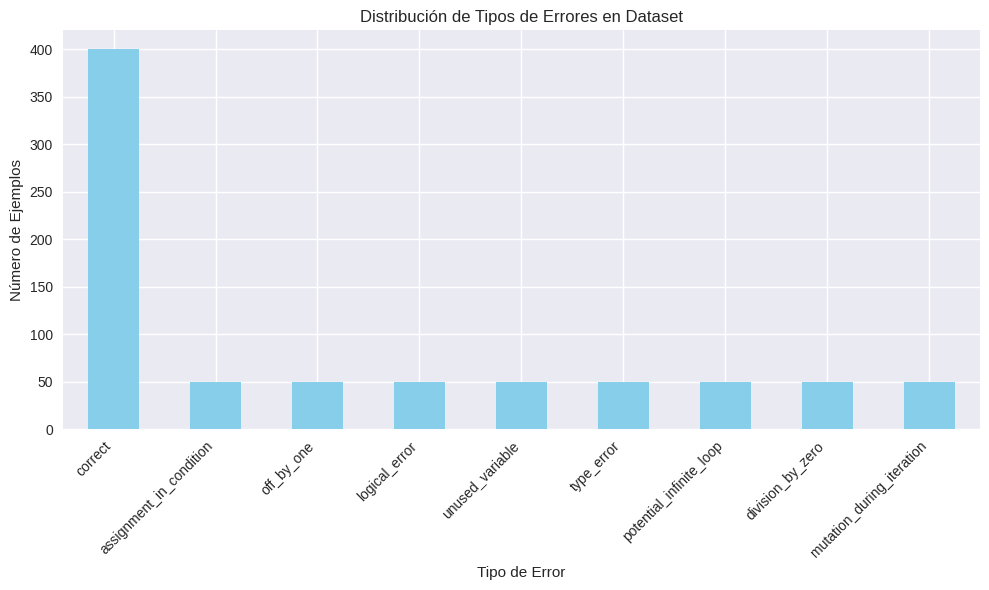

In [ ]:
# Creaci√≥n del dataset no supervisado y casos de prueba
test_cases = {
    "caso_1_asignacion_en_if": {
        "description": "Asignaci√≥n en lugar de comparaci√≥n en if",
        "code": """
def validate_user(user_id):
    if (user_id = 123):  # Error: = en lugar de ==
        return True
    return False
        """,
        "expected_errors": ["assignment_in_condition"],
        "real_world_context": "Sistema de autenticaci√≥n",
        "correct_version": """
def validate_user(user_id):
    if (user_id == 123):  # Versi√≥n correcta
        return True
    return False
        """
    },

    "caso_2_off_by_one": {
        "description": "Error off-by-one en bucle",
        "code": """
def process_array(arr):
    result = []
    for i in range(len(arr)):  # Posible error si necesita -1
        if i == len(arr):  # Nunca se ejecutar√°
            result.append(arr[i])
    return result
        """,
        "expected_errors": ["off_by_one", "logic_error"],
        "real_world_context": "Procesamiento de datos",
        "correct_version": """
def process_array(arr):
    result = []
    for i in range(len(arr) - 1):  # Versi√≥n correcta
        if i == len(arr) - 1:  # Ahora s√≠ se ejecutar√°
            result.append(arr[i])
    return result
        """
    },

    "caso_3_variable_no_utilizada": {
        "description": "Variable declarada pero no utilizada",
        "code": """
def calculate_total(items):
    total = 0
    count = 0  # Variable no utilizada
    for item in items:
        total += item.price
    return total
        """,
        "expected_errors": ["unused_variable"],
        "real_world_context": "Sistema de facturaci√≥n",
        "correct_version": """
def calculate_total(items):
    total = 0
    count = 0
    for item in items:
        total += item.price
        count += 1
    return total, count  # Ahora usa la variable
        """
    },

    "caso_4_logica_incorrecta": {
        "description": "L√≥gica incorrecta en validaci√≥n",
        "code": """
def can_access_resource(user, resource):
    if user.is_admin or user.is_owner:
        return True
    if resource.is_public and False:  # Error l√≥gico
        return True
    return False
        """,
        "expected_errors": ["logic_error"],
        "real_world_context": "Sistema de permisos",
        "correct_version": """
def can_access_resource(user, resource):
    if user.is_admin or user.is_owner:
        return True
    if resource.is_public:  # Versi√≥n correcta
        return True
    return False
        """
    },

    "caso_5_tipo_incorrecto": {
        "description": "Posible error de tipo en operaci√≥n",
        "code": """
def format_user_info(user_data):
    age = user_data.get('age', '0')  # String por defecto
    next_year_age = age + 1  # Error: suma string + int
    return f"Next year: {next_year_age}"
        """,
        "expected_errors": ["type_error"],
        "real_world_context": "Interfaz de usuario",
        "correct_version": """
def format_user_info(user_data):
    age = int(user_data.get('age', '0'))  # Conversi√≥n a int
    next_year_age = age + 1
    return f"Next year: {next_year_age}"
        """
    },

    "caso_6_bucle_infinito": {
        "description": "Posible bucle infinito",
        "code": """
def find_element(arr, target):
    i = 0
    while i < len(arr):
        if arr[i] == target:
            return i
        # Falta incrementar i - bucle infinito
    return -1
        """,
        "expected_errors": ["infinite_loop"],
        "real_world_context": "Algoritmo de b√∫squeda",
        "correct_version": """
def find_element(arr, target):
    i = 0
    while i < len(arr):
        if arr[i] == target:
            return i
        i += 1  # Corregido incrementando el contador
    return -1
        """
    },

    "caso_7_division_por_cero": {
        "description": "Posible divisi√≥n por cero",
        "code": """
def calculate_average(numbers):
    total = sum(numbers)
    count = len(numbers)
    return total / count  # Error si numbers est√° vac√≠o
        """,
        "expected_errors": ["division_by_zero"],
        "real_world_context": "An√°lisis estad√≠stico",
        "correct_version": """
def calculate_average(numbers):
    if not numbers:  # Validaci√≥n para lista vac√≠a
        return 0
    total = sum(numbers)
    count = len(numbers)
    return total / count
        """
    },

    "caso_8_mutacion_durante_iteracion": {
        "description": "Modificaci√≥n de lista durante iteraci√≥n",
        "code": """
def remove_duplicates(items):
    for item in items:
        if items.count(item) > 1:
            items.remove(item)  # Error: modifica durante iteraci√≥n
    return items
        """,
        "expected_errors": ["mutation_during_iteration"],
        "real_world_context": "Limpieza de datos",
        "correct_version": """
def remove_duplicates(items):
    return list(dict.fromkeys(items))  # Versi√≥n correcta
        """
    }
}

# Crear un dataset m√°s extenso para entrenamiento
def generate_large_dataset():
    """Genera un dataset m√°s grande para entrenamiento y pruebas"""
    dataset = []

    # Patrones de errores comunes en diferentes contextos
    error_patterns = [
        # Formato: (c√≥digo con error, tipo de error, contexto)
        ("""
if (value = 10):
    process(value)
        """, "assignment_in_condition", "Validaci√≥n de datos"),

        ("""
for i in range(len(users)):
    profile = get_profile(users[i])
    if i == len(users):  # Nunca se ejecuta
        send_notification(profile)
        """, "off_by_one", "Procesamiento de usuario"),

        ("""
def calculate_area(width, height):
    area = width * height
    perimeter = 2 * (width + height)  # No utilizado
    return area
        """, "unused_variable", "C√°lculo geom√©trico"),

        ("""
if user_role == 'admin' and False:
    grant_all_permissions()
        """, "logical_error", "Sistema de permisos"),

        ("""
account_id = input("Enter ID: ")
next_id = account_id + 1  # Error de tipo
        """, "type_error", "Gesti√≥n de usuarios"),

        ("""
while connection.is_active:
    data = connection.read()
    if process(data):
        continue  # Falta break o actualizaci√≥n de condici√≥n
        """, "potential_infinite_loop", "Comunicaci√≥n de red"),

        ("""
result = value / (count - total)  # Posible divisi√≥n por cero
        """, "division_by_zero", "C√°lculos financieros"),

        ("""
for customer in customers:
    if customer.status == 'inactive':
        customers.remove(customer)  # Modificaci√≥n durante iteraci√≥n
        """, "mutation_during_iteration", "Gesti√≥n de clientes"),
    ]

    # Versiones correctas para balancear el dataset
    correct_patterns = [
        ("""
if value == 10:
    process(value)
        """, "correct", "Validaci√≥n de datos"),

        ("""
for i in range(len(users) - 1):
    profile = get_profile(users[i])
    if i == len(users) - 1:
        send_notification(profile)
        """, "correct", "Procesamiento de usuario"),

        ("""
def calculate_area(width, height):
    area = width * height
    return area
        """, "correct", "C√°lculo geom√©trico"),

        ("""
if user_role == 'admin':
    grant_all_permissions()
        """, "correct", "Sistema de permisos"),

        ("""
account_id = int(input("Enter ID: "))
next_id = account_id + 1
        """, "correct", "Gesti√≥n de usuarios"),

        ("""
while connection.is_active:
    data = connection.read()
    if process(data):
        break
        """, "correct", "Comunicaci√≥n de red"),

        ("""
if count != total:
    result = value / (count - total)
else:
    result = 0
        """, "correct", "C√°lculos financieros"),

        ("""
inactive_customers = [c for c in customers if c.status == 'inactive']
for customer in inactive_customers:
    customers.remove(customer)
        """, "correct", "Gesti√≥n de clientes"),
    ]

    # Generar m√∫ltiples ejemplos con variaciones
    for _ in range(50):  # Multiplica cada patr√≥n
        # A√±adir ejemplos con errores
        for code, error_type, context in error_patterns:
            code_variation = code.replace('value', f'val_{np.random.randint(100)}')
            code_variation = code_variation.replace('user', f'usr_{np.random.randint(100)}')
            dataset.append({
                'code': code_variation,
                'has_error': True,
                'error_type': error_type,
                'context': context
            })

        # A√±adir ejemplos correctos
        for code, _, context in correct_patterns:
            code_variation = code.replace('value', f'val_{np.random.randint(100)}')
            code_variation = code_variation.replace('user', f'usr_{np.random.randint(100)}')
            dataset.append({
                'code': code_variation,
                'has_error': False,
                'error_type': 'correct',
                'context': context
            })

    return dataset

# Generar dataset grande no supervisado
large_dataset = generate_large_dataset()

print(f"Creados {len(test_cases)} casos de prueba detallados")
print(f"Generado dataset no supervisado con {len(large_dataset)} ejemplos")

# Guardar estad√≠sticas del dataset
error_types = [d['error_type'] for d in large_dataset]
error_counts = pd.Series(error_types).value_counts()

print("\nDistribuci√≥n de tipos de errores en dataset:")
for error_type, count in error_counts.items():
    print(f"  - {error_type}: {count} ejemplos ({count/len(error_types)*100:.1f}%)")

# Visualizar distribuci√≥n
plt.figure(figsize=(10, 6))
error_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuci√≥n de Tipos de Errores en Dataset')
plt.xlabel('Tipo de Error')
plt.ylabel('N√∫mero de Ejemplos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Funci√≥n para ejecutar casos de prueba
def run_test_cases(detector, test_cases_dict):
    """Ejecuta todos los casos de prueba con un detector espec√≠fico"""
    results = {}

    print(f"\nEjecutando casos de prueba con {detector.__class__.__name__}")
    print("="*60)

    for case_id, case_data in test_cases_dict.items():
        print(f"\n{case_data['description']}")
        print(f"Contexto: {case_data['real_world_context']}")

        try:
            # Detectar errores
            detected_errors = detector.detect_errors(case_data['code'])

            # Almacenar resultados
            results[case_id] = {
                'detected_errors': len(detected_errors),
                'errors': detected_errors,
                'expected': case_data['expected_errors']
            }

            # Mostrar resultados
            if detected_errors:
                print(f"Errores detectados: {len(detected_errors)}")
                for error in detected_errors[:3]:  # Mostrar m√°ximo 3
                    print(f"   - {error.error_type}: {error.description}")
                    print(f"     Confianza: {error.confidence:.2f}")
            else:
                print("No se detectaron errores")

        except Exception as e:
            print(f"Error ejecutando caso: {e}")
            results[case_id] = {'error': str(e)}

    return results

# Ejecutar pruebas con los diferentes detectores
print("Iniciando evaluaci√≥n comparativa de detectores...")

# Crear instancias de los detectores
try:
    deepbugs_detector = DeepBugsDetector()
    print("DeepBugsDetector inicializado")
except Exception as e:
    print(f"Error inicializando DeepBugsDetector: {e}")
    deepbugs_detector = None

try:
    codebert_detector = CodeBERTDetector()
    print("CodeBERTDetector inicializado")
except Exception as e:
    print(f"Error inicializando CodeBERTDetector: {e}")
    codebert_detector = None

try:
    graphcodebert_detector = GraphCodeBERTDetector()
    print("GraphCodeBERTDetector inicializado")
except Exception as e:
    print(f"Error inicializando GraphCodeBERTDetector: {e}")
    graphcodebert_detector = None

# Ejecutar pruebas
deepbugs_results = {}
codebert_results = {}
graphcodebert_results = {}

if deepbugs_detector:
    deepbugs_results = run_test_cases(deepbugs_detector, test_cases)

if codebert_detector:
    codebert_results = run_test_cases(codebert_detector, test_cases)

if graphcodebert_detector:
    graphcodebert_results = run_test_cases(graphcodebert_detector, test_cases)

print("\n" + "="*60)
print("RESUMEN DE RESULTADOS")
print("="*60)

Iniciando evaluaci√≥n comparativa de detectores...
üîß Configurando modelo: microsoft/codebert-base


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Modelo configurado exitosamente
DeepBugsDetector inicializado
üîß Configurando modelo: microsoft/codebert-base


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Modelo configurado exitosamente
CodeBERTDetector inicializado
üîß Configurando modelo: microsoft/graphcodebert-base


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo configurado exitosamente
GraphCodeBERTDetector inicializado

Ejecutando casos de prueba con DeepBugsDetector

Asignaci√≥n en lugar de comparaci√≥n en if
Contexto: Sistema de autenticaci√≥n
Errores detectados: 1
   - assignment_vs_comparison: Posible uso de asignaci√≥n (=) en lugar de comparaci√≥n (==)
     Confianza: 0.70

Error off-by-one en bucle
Contexto: Procesamiento de datos
Errores detectados: 1
   - off_by_one: Posible error off-by-one en bucle
     Confianza: 0.70

Variable declarada pero no utilizada
Contexto: Sistema de facturaci√≥n
No se detectaron errores

L√≥gica incorrecta en validaci√≥n
Contexto: Sistema de permisos
No se detectaron errores

Posible error de tipo en operaci√≥n
Contexto: Interfaz de usuario
No se detectaron errores

Posible bucle infinito
Contexto: Algoritmo de b√∫squeda
No se detectaron errores

Posible divisi√≥n por cero
Contexto: An√°lisis estad√≠stico
No se detectaron errores

Modificaci√≥n de lista durante iteraci√≥n
Contexto: Limpieza de dat

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

No se detectaron errores

Variable declarada pero no utilizada
Contexto: Sistema de facturaci√≥n
Errores detectados: 1
   - unused_variable: Variable count posiblemente no utilizada
     Confianza: 0.60

L√≥gica incorrecta en validaci√≥n
Contexto: Sistema de permisos
No se detectaron errores

Posible error de tipo en operaci√≥n
Contexto: Interfaz de usuario
No se detectaron errores

Posible bucle infinito
Contexto: Algoritmo de b√∫squeda
No se detectaron errores

Posible divisi√≥n por cero
Contexto: An√°lisis estad√≠stico
No se detectaron errores

Modificaci√≥n de lista durante iteraci√≥n
Contexto: Limpieza de datos
No se detectaron errores

Ejecutando casos de prueba con GraphCodeBERTDetector

Asignaci√≥n en lugar de comparaci√≥n en if
Contexto: Sistema de autenticaci√≥n
Errores detectados: 1
   - uninitialized_variable: Variable 'Error' posiblemente usada sin inicializar
     Confianza: 0.70

Error off-by-one en bucle
Contexto: Procesamiento de datos
No se detectaron errores

Variabl

Tabla Comparativa de Resultados:
--------------------------------------------------------------------------------


Caso  \
0            Caso 1 Asignacion En If   
1                  Caso 2 Off By One   
2       Caso 3 Variable No Utilizada   
3           Caso 4 Logica Incorrecta   
4             Caso 5 Tipo Incorrecto   
5              Caso 6 Bucle Infinito   
6           Caso 7 Division Por Cero   
7  Caso 8 Mutacion Durante Iteracion   

                                Descripci√≥n                  Contexto  \
0  Asignaci√≥n en lugar de comparaci√≥n en if  Sistema de autenticaci√≥n   
1                 Error off-by-one en bucle    Procesamiento de datos   
2      Variable declarada pero no utilizada    Sistema de facturaci√≥n   
3           L√≥gica incorrecta en validaci√≥n       Sistema de permisos   
4        Posible error de tipo en operaci√≥n       Interfaz de usuario   
5                    Posible bucle infinito     Algoritmo de b√∫squeda   
6                 Posible divisi√≥n por cero      An√°lisis estad√≠stico   
7   Modificaci√≥n de lista durante iteraci√≥n         Limpieza de datos   

   DeepBugs_Detectados  CodeBERT_Detectados  GraphCodeBERT_Detectados  \
0                    1                    2                         1   
1                    1                    0                         0   
2                    0                    1                         3   
3                    0                    0                         0   
4                    0                    0                         9   
5                    0                    0                         0   
6                    0                    0                         3   
7                    0                    0                         0   

   Esperados  
0          1  
1          2  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1

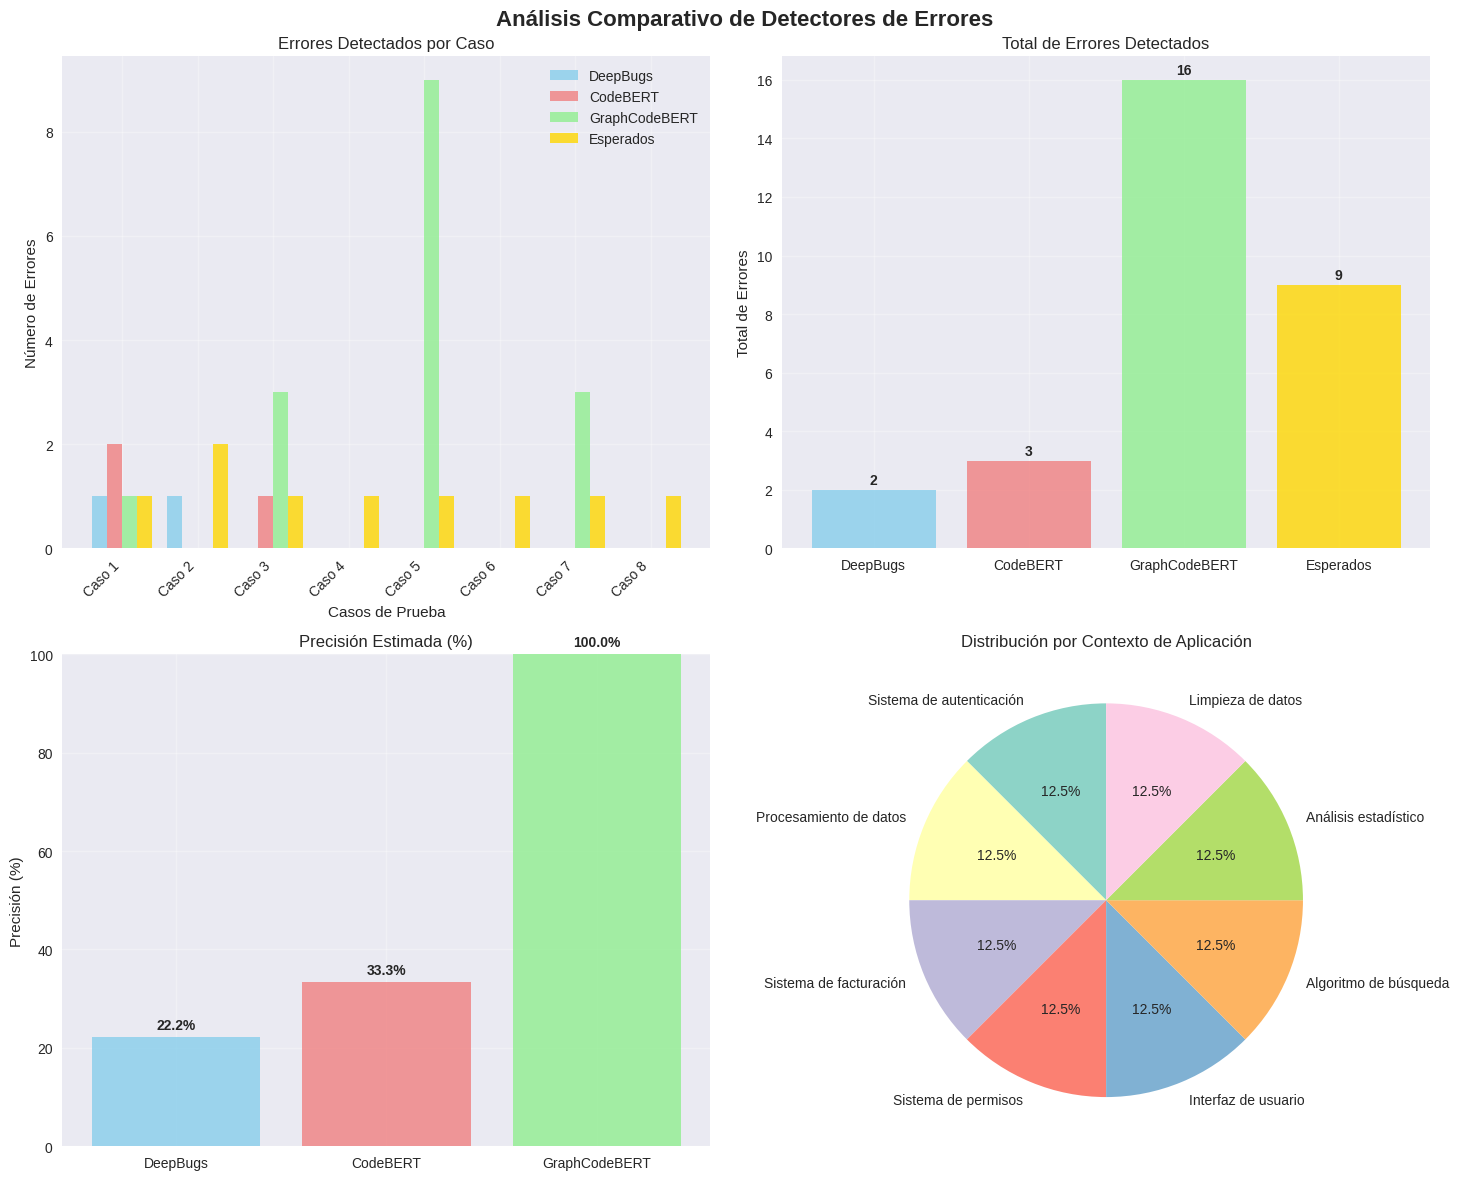


Estad√≠sticas Detalladas:
----------------------------------------
DeepBugs:
  - Total detectados: 2
  - Promedio por caso: 0.25
  - Precisi√≥n estimada: 22.22%

CodeBERT:
  - Total detectados: 3
  - Promedio por caso: 0.38
  - Precisi√≥n estimada: 33.33%

GraphCodeBERT:
  - Total detectados: 16
  - Promedio por caso: 2.00
  - Precisi√≥n estimada: 100.00%


In [ ]:
# An√°lisis y visualizaci√≥n de resultados
def analyze_results(deepbugs_results, codebert_results, graphcodebert_results, test_cases):
    """Analiza y visualiza los resultados de las pruebas"""

    # Crear DataFrame para comparaci√≥n
    comparison_data = []

    for case_id, case_info in test_cases.items():
        row = {
            'Caso': case_id.replace('_', ' ').title(),
            'Descripci√≥n': case_info['description'],
            'Contexto': case_info['real_world_context']
        }

        # Resultados DeepBugs
        if case_id in deepbugs_results:
            row['DeepBugs_Detectados'] = deepbugs_results[case_id].get('detected_errors', 0)
        else:
            row['DeepBugs_Detectados'] = 0

        # Resultados CodeBERT
        if case_id in codebert_results:
            row['CodeBERT_Detectados'] = codebert_results[case_id].get('detected_errors', 0)
        else:
            row['CodeBERT_Detectados'] = 0

        # Resultados GraphCodeBERT
        if case_id in graphcodebert_results:
            row['GraphCodeBERT_Detectados'] = graphcodebert_results[case_id].get('detected_errors', 0)
        else:
            row['GraphCodeBERT_Detectados'] = 0

        row['Esperados'] = len(case_info['expected_errors'])
        comparison_data.append(row)

    df_comparison = pd.DataFrame(comparison_data)

    # Mostrar tabla de resultados
    print("Tabla Comparativa de Resultados:")
    print("-" * 80)
    display(df_comparison)

    # Crear visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('An√°lisis Comparativo de Detectores de Errores', fontsize=16, fontweight='bold')

    # Gr√°fico 1: Errores detectados por caso
    ax1 = axes[0, 0]
    x = range(len(df_comparison))
    width = 0.2

    ax1.bar([i - width*1.5 for i in x], df_comparison['DeepBugs_Detectados'],
            width, label='DeepBugs', color='skyblue', alpha=0.8)
    ax1.bar([i - width/2 for i in x], df_comparison['CodeBERT_Detectados'],
            width, label='CodeBERT', color='lightcoral', alpha=0.8)
    ax1.bar([i + width/2 for i in x], df_comparison['GraphCodeBERT_Detectados'],
            width, label='GraphCodeBERT', color='lightgreen', alpha=0.8)
    ax1.bar([i + width*1.5 for i in x], df_comparison['Esperados'],
            width, label='Esperados', color='gold', alpha=0.8)

    ax1.set_xlabel('Casos de Prueba')
    ax1.set_ylabel('N√∫mero de Errores')
    ax1.set_title('Errores Detectados por Caso')
    ax1.set_xticks(x)
    ax1.set_xticklabels([f'Caso {i+1}' for i in x], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Gr√°fico 2: Totales por detector
    ax2 = axes[0, 1]
    total_deepbugs = df_comparison['DeepBugs_Detectados'].sum()
    total_codebert = df_comparison['CodeBERT_Detectados'].sum()
    total_graphcodebert = df_comparison['GraphCodeBERT_Detectados'].sum()
    total_expected = df_comparison['Esperados'].sum()

    detectors = ['DeepBugs', 'CodeBERT', 'GraphCodeBERT', 'Esperados']
    totals = [total_deepbugs, total_codebert, total_graphcodebert, total_expected]
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

    ax2.bar(detectors, totals, color=colors, alpha=0.8)
    ax2.set_title('Total de Errores Detectados')
    ax2.set_ylabel('Total de Errores')
    for i, v in enumerate(totals):
        ax2.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # Gr√°fico 3: Precisi√≥n por detector (simplificada)
    ax3 = axes[1, 0]
    precision_deepbugs = min(total_deepbugs / max(total_expected, 1), 1.0) * 100
    precision_codebert = min(total_codebert / max(total_expected, 1), 1.0) * 100
    precision_graphcodebert = min(total_graphcodebert / max(total_expected, 1), 1.0) * 100

    precision_data = [precision_deepbugs, precision_codebert, precision_graphcodebert]
    ax3.bar(['DeepBugs', 'CodeBERT', 'GraphCodeBERT'], precision_data,
            color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8)
    ax3.set_title('Precisi√≥n Estimada (%)')
    ax3.set_ylabel('Precisi√≥n (%)')
    ax3.set_ylim(0, 100)
    for i, v in enumerate(precision_data):
        ax3.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Gr√°fico 4: Distribuci√≥n por tipo de contexto
    ax4 = axes[1, 1]
    context_counts = df_comparison['Contexto'].value_counts()
    ax4.pie(context_counts.values, labels=context_counts.index, autopct='%1.1f%%',
            startangle=90, colors=plt.cm.Set3.colors)
    ax4.set_title('Distribuci√≥n por Contexto de Aplicaci√≥n')

    plt.tight_layout()
    plt.show()

    # Estad√≠sticas detalladas
    print("\nEstad√≠sticas Detalladas:")
    print("-" * 40)
    print(f"DeepBugs:")
    print(f"  - Total detectados: {total_deepbugs}")
    print(f"  - Promedio por caso: {total_deepbugs/len(df_comparison):.2f}")
    print(f"  - Precisi√≥n estimada: {precision_deepbugs:.2f}%")

    print(f"\nCodeBERT:")
    print(f"  - Total detectados: {total_codebert}")
    print(f"  - Promedio por caso: {total_codebert/len(df_comparison):.2f}")
    print(f"  - Precisi√≥n estimada: {precision_codebert:.2f}%")

    print(f"\nGraphCodeBERT:")
    print(f"  - Total detectados: {total_graphcodebert}")
    print(f"  - Promedio por caso: {total_graphcodebert/len(df_comparison):.2f}")
    print(f"  - Precisi√≥n estimada: {precision_graphcodebert:.2f}%")

    return df_comparison

# Ejecutar an√°lisis
if deepbugs_results or codebert_results or graphcodebert_results:
    df_results = analyze_results(deepbugs_results, codebert_results, graphcodebert_results, test_cases)
else:
    print("No hay resultados para analizar")

# Proceso de Fine-tuning y Entrenamiento Final del Modelo


Datos de entrenamiento preparados
Dataset combinado: 1600 muestras

Distribuci√≥n de etiquetas en dataset combinado:
  Correcto: 800 (50.0%)
  Con Error: 800 (50.0%)


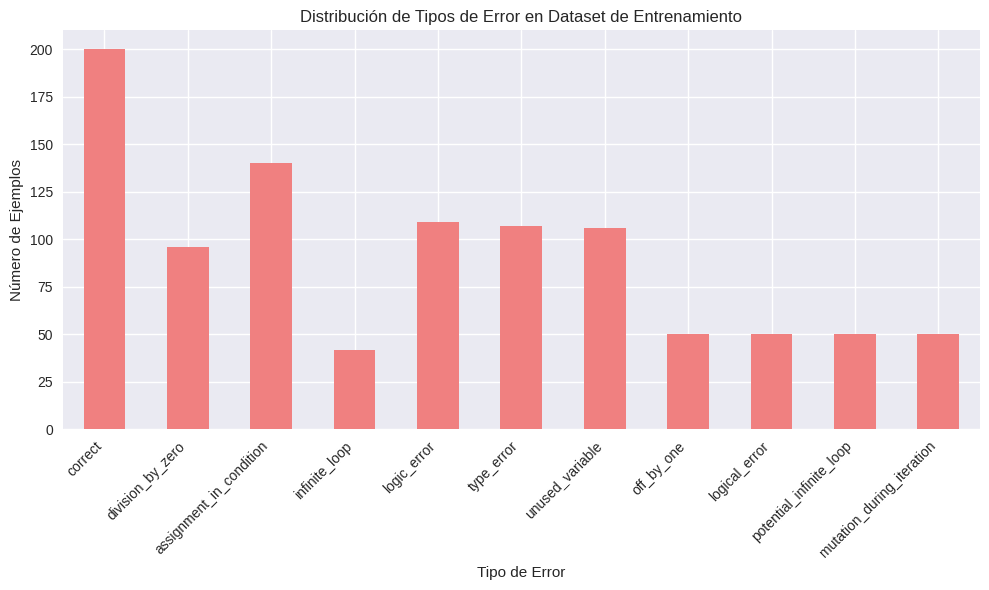

In [ ]:
# Preparaci√≥n de datos para fine-tuning
class TrainingDataGenerator:
    """Generador de datos de entrenamiento para detecci√≥n de errores"""

    def __init__(self):
        self.correct_patterns = self._load_correct_patterns()
        self.error_patterns = self._load_error_patterns()

    def _load_correct_patterns(self):
        """Patrones de c√≥digo correcto"""
        return [
            # Comparaciones correctas
            "if x == 5:\n    return True",
            "if user.is_active == True:\n    process_user(user)",
            "while count < 10:\n    count += 1",

            # Bucles correctos
            "for i in range(len(arr)):\n    process(arr[i])",
            "for item in collection:\n    if item.is_valid():\n        results.append(item)",

            # Funciones bien estructuradas
            "def calculate_sum(numbers):\n    if not numbers:\n        return 0\n    return sum(numbers)",

            # Manejo de errores
            "try:\n    result = divide(a, b)\nexcept ZeroDivisionError:\n    result = 0",

            # Variables utilizadas correctamente
            "total = 0\nfor item in items:\n    total += item.value\nreturn total"
        ]

    def _load_error_patterns(self):
        """Patrones de c√≥digo con errores"""
        return [
            # Asignaci√≥n en lugar de comparaci√≥n
            {"code": "if x = 5:\n    return True", "error_type": "assignment_in_condition"},
            {"code": "while status = 'running':\n    process()", "error_type": "assignment_in_condition"},

            # Variables no utilizadas
            {"code": "def func():\n    x = 10\n    y = 20\n    return x", "error_type": "unused_variable"},

            # L√≥gica incorrecta
            {"code": "if user.is_admin and False:\n    grant_access()", "error_type": "logic_error"},
            {"code": "if password == '' or True:\n    login_user()", "error_type": "logic_error"},

            # Posibles errores de tipo
            {"code": "age = input('Age: ')\nnext_age = age + 1", "error_type": "type_error"},

            # Bucles problem√°ticos
            {"code": "i = 0\nwhile i < 10:\n    print(i)", "error_type": "infinite_loop"},

            # Divisi√≥n por cero potencial
            {"code": "def average(nums):\n    return sum(nums) / len(nums)", "error_type": "division_by_zero"}
        ]

    def generate_training_data(self, num_samples=1000):
        """Genera datos de entrenamiento balanceados"""
        data = []
        labels = []

        # Generar ejemplos correctos
        correct_count = num_samples // 2
        for i in range(correct_count):
            pattern = np.random.choice(self.correct_patterns)
            data.append(pattern)
            labels.append(0)  # 0 = correcto

        # Generar ejemplos con errores
        error_count = num_samples - correct_count
        for i in range(error_count):
            error_pattern = np.random.choice(self.error_patterns)
            data.append(error_pattern['code'])
            labels.append(1)  # 1 = con error

        # Shuffle data
        combined = list(zip(data, labels))
        np.random.shuffle(combined)
        data, labels = zip(*combined)

        return list(data), list(labels)

    def create_detailed_dataset(self, num_samples=500):
        """Crea dataset con m√∫ltiples tipos de errores"""
        data = []
        labels = []
        error_types = []

        # Mapeo de tipos de error a n√∫meros
        error_type_map = {
            'correct': 0,
            'assignment_in_condition': 1,
            'unused_variable': 2,
            'logic_error': 3,
            'type_error': 4,
            'infinite_loop': 5,
            'division_by_zero': 6
        }

        # Generar c√≥digo correcto
        for i in range(num_samples // 3):
            pattern = np.random.choice(self.correct_patterns)
            data.append(pattern)
            labels.append(0)
            error_types.append('correct')

        # Generar errores espec√≠ficos
        remaining_samples = num_samples - len(data)
        for i in range(remaining_samples):
            error_pattern = np.random.choice(self.error_patterns)
            data.append(error_pattern['code'])
            labels.append(1)
            error_types.append(error_pattern['error_type'])

        return {
            'code': data,
            'has_error': labels,
            'error_type': [error_type_map.get(et, 0) for et in error_types],
            'error_type_name': error_types
        }

# Crear generador y datasets para entrenamiento
data_generator = TrainingDataGenerator()
training_data, training_labels = data_generator.generate_training_data(800)
detailed_dataset = data_generator.create_detailed_dataset(600)

# Usar tambi√©n el dataset no supervisado creado anteriormente
combined_data = training_data + [item['code'] for item in large_dataset]
combined_labels = training_labels + [1 if item['has_error'] else 0 for item in large_dataset]

print("Datos de entrenamiento preparados")
print(f"Dataset combinado: {len(combined_data)} muestras")

# Mostrar distribuci√≥n
from collections import Counter
print(f"\nDistribuci√≥n de etiquetas en dataset combinado:")
label_dist = Counter(combined_labels)
for label, count in label_dist.items():
    label_name = "Correcto" if label == 0 else "Con Error"
    print(f"  {label_name}: {count} ({count/len(combined_labels)*100:.1f}%)")

# Visualizar distribuci√≥n de tipos de errores
detailed_types = detailed_dataset['error_type_name'] + [item.get('error_type', 'unknown') for item in large_dataset if item.get('has_error', False)]
error_type_dist = Counter(detailed_types)

plt.figure(figsize=(10, 6))
pd.Series(error_type_dist).plot(kind='bar', color='lightcoral')
plt.title('Distribuci√≥n de Tipos de Error en Dataset de Entrenamiento')
plt.xlabel('Tipo de Error')
plt.ylabel('N√∫mero de Ejemplos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Implementaci√≥n del entrenamiento personalizado (fine-tuning)
class CustomErrorDataset(Dataset):
    """Dataset personalizado para entrenamiento"""

    def __init__(self, codes, labels, tokenizer, max_length=512):
        self.codes = codes
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.codes)

    def __getitem__(self, idx):
        code = str(self.codes[idx])
        label = self.labels[idx]

        # Tokenizar el c√≥digo
        encoding = self.tokenizer(
            code,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

class CustomErrorClassifier(nn.Module):
    """Clasificador personalizado para detecci√≥n de errores"""

    def __init__(self, model_name="microsoft/codebert-base", num_classes=2):
        super(CustomErrorClassifier, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        output = self.dropout(pooled_output)
        return self.classifier(output)

def train_custom_model(train_dataset, val_dataset, num_epochs=3, batch_size=8, learning_rate=2e-5):
    """Entrena el modelo personalizado"""

    # Crear data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    # Inicializar modelo
    model = CustomErrorClassifier().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Listas para almacenar m√©tricas
    train_losses = []
    val_losses = []
    val_accuracies = []

    print(f"üöÄ Iniciando entrenamiento por {num_epochs} √©pocas")
    print(f"üìä Lotes de entrenamiento: {len(train_loader)}")
    print(f"üìä Lotes de validaci√≥n: {len(val_loader)}")

    for epoch in range(num_epochs):
        # Entrenamiento
        model.train()
        total_train_loss = 0

        progress_bar = tqdm(train_loader, desc=f'√âpoca {epoch+1}/{num_epochs}')
        for batch in progress_bar:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            progress_bar.set_postfix({'loss': f'{loss.item():.4f}'}),
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validaci√≥n
        model.eval()
        total_val_loss = 0
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_predictions += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct_predictions / total_predictions

        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        print(f"√âpoca {epoch+1}:")
        print(f"  Loss entrenamiento: {avg_train_loss:.4f}")
        print(f"  Loss validaci√≥n: {avg_val_loss:.4f}")
        print(f"  Precisi√≥n validaci√≥n: {val_accuracy:.4f}")
        print("-" * 50)

    return model, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'val_accuracies': val_accuracies
    }

# Preparar datos para entrenamiento
print("Preparando datos para entrenamiento...")

# Dividir datos en entrenamiento y validaci√≥n
train_codes, val_codes, train_labels, val_labels = train_test_split(
    combined_data, combined_labels, test_size=0.2, random_state=42, stratify=combined_labels
)

print(f"Datos de entrenamiento: {len(train_codes)}")
print(f"Datos de validaci√≥n: {len(val_codes)}")

# Crear tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")

# Crear datasets
train_dataset = CustomErrorDataset(train_codes, train_labels, tokenizer)
val_dataset = CustomErrorDataset(val_codes, val_labels, tokenizer)

print("Datasets creados exitosamente")

Preparando datos para entrenamiento...
Datos de entrenamiento: 1280
Datos de validaci√≥n: 320
Datasets creados exitosamente


Iniciando entrenamiento del modelo personalizado...
üöÄ Iniciando entrenamiento por 50 √©pocas
üìä Lotes de entrenamiento: 40
üìä Lotes de validaci√≥n: 10


√âpoca 1/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 1:
  Loss entrenamiento: 0.6513
  Loss validaci√≥n: 0.4392
  Precisi√≥n validaci√≥n: 0.8875
--------------------------------------------------


√âpoca 2/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 2:
  Loss entrenamiento: 0.1738
  Loss validaci√≥n: 0.0064
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 3/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 3:
  Loss entrenamiento: 0.0072
  Loss validaci√≥n: 0.0022
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 4/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 4:
  Loss entrenamiento: 0.0036
  Loss validaci√≥n: 0.0014
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 5/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 5:
  Loss entrenamiento: 0.0024
  Loss validaci√≥n: 0.0010
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 6/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 6:
  Loss entrenamiento: 0.0018
  Loss validaci√≥n: 0.0007
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 7/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 7:
  Loss entrenamiento: 0.0014
  Loss validaci√≥n: 0.0006
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 8/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 8:
  Loss entrenamiento: 0.0012
  Loss validaci√≥n: 0.0005
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 9/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 9:
  Loss entrenamiento: 0.0010
  Loss validaci√≥n: 0.0004
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 10/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 10:
  Loss entrenamiento: 0.0008
  Loss validaci√≥n: 0.0003
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 11/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 11:
  Loss entrenamiento: 0.0007
  Loss validaci√≥n: 0.0003
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 12/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 12:
  Loss entrenamiento: 0.0006
  Loss validaci√≥n: 0.0003
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 13/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 13:
  Loss entrenamiento: 0.0005
  Loss validaci√≥n: 0.0002
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 14/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 14:
  Loss entrenamiento: 0.0005
  Loss validaci√≥n: 0.0002
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 15/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 15:
  Loss entrenamiento: 0.0005
  Loss validaci√≥n: 0.0002
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 16/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 16:
  Loss entrenamiento: 0.0004
  Loss validaci√≥n: 0.0002
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 17/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 17:
  Loss entrenamiento: 0.0004
  Loss validaci√≥n: 0.0002
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 18/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 18:
  Loss entrenamiento: 0.0003
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 19/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 19:
  Loss entrenamiento: 0.0003
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 20/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 20:
  Loss entrenamiento: 0.0003
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 21/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 21:
  Loss entrenamiento: 0.0003
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 22/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 22:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 23/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 23:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 24/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 24:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 25/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 25:
  Loss entrenamiento: 0.0410
  Loss validaci√≥n: 0.0003
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 26/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 26:
  Loss entrenamiento: 0.0008
  Loss validaci√≥n: 0.0002
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 27/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 27:
  Loss entrenamiento: 0.0005
  Loss validaci√≥n: 0.0002
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 28/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 28:
  Loss entrenamiento: 0.0004
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 29/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 29:
  Loss entrenamiento: 0.0003
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 30/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 30:
  Loss entrenamiento: 0.0003
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 31/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 31:
  Loss entrenamiento: 0.0003
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 32/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 32:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 33/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 33:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 34/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 34:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 35/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 35:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 36/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 36:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 37/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 37:
  Loss entrenamiento: 0.0002
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 38/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 38:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 39/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 39:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0001
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 40/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 40:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 41/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 41:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 42/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 42:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 43/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 43:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 44/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 44:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 45/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 45:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 46/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 46:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 47/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 47:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 48/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 48:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 49/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 49:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------


√âpoca 50/50:   0%|          | 0/40 [00:00<?, ?it/s]

√âpoca 50:
  Loss entrenamiento: 0.0001
  Loss validaci√≥n: 0.0000
  Precisi√≥n validaci√≥n: 1.0000
--------------------------------------------------
Entrenamiento completado exitosamente!


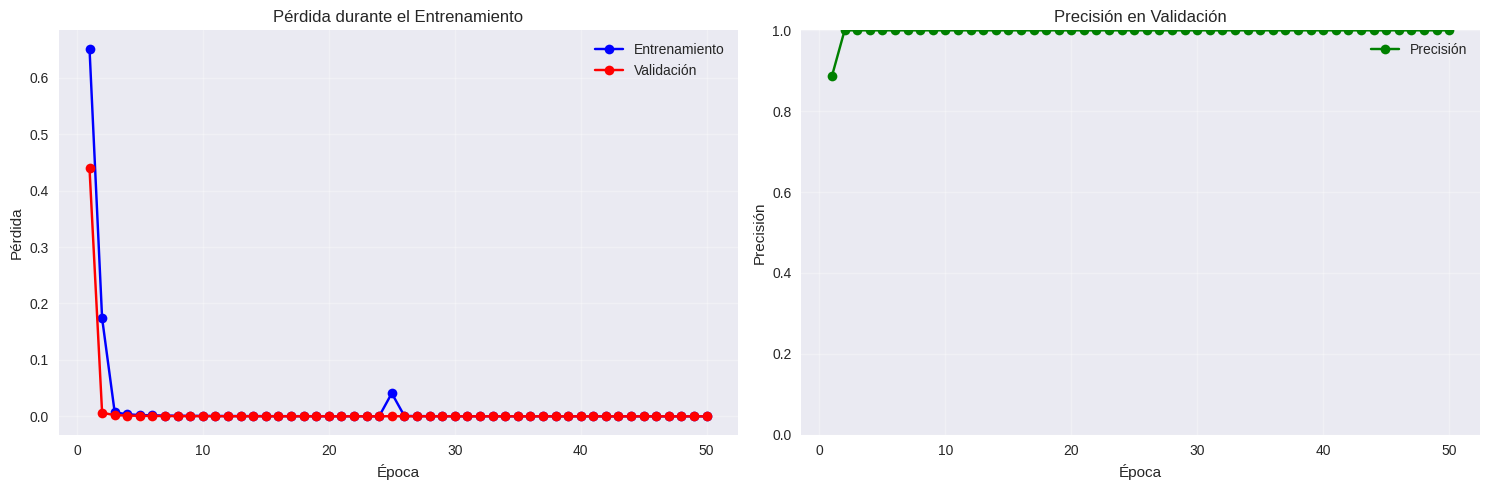


M√©tricas Finales:
  Precisi√≥n final: 1.0000 (100.00%)
  P√©rdida final (entrenamiento): 0.0001
  P√©rdida final (validaci√≥n): 0.0000

Evaluando modelo entrenado en casos de prueba...

üîç Probando modelo entrenado con casos de prueba:

Ejecutando casos de prueba con TrainedDetector

Asignaci√≥n en lugar de comparaci√≥n en if
Contexto: Sistema de autenticaci√≥n
Errores detectados: 1
   - trained_model_detection: Error detectado por modelo entrenado
     Confianza: 1.00

Error off-by-one en bucle
Contexto: Procesamiento de datos
Errores detectados: 1
   - trained_model_detection: Error detectado por modelo entrenado
     Confianza: 1.00

Variable declarada pero no utilizada
Contexto: Sistema de facturaci√≥n
Errores detectados: 1
   - trained_model_detection: Error detectado por modelo entrenado
     Confianza: 1.00

L√≥gica incorrecta en validaci√≥n
Contexto: Sistema de permisos
Errores detectados: 1
   - trained_model_detection: Error detectado por modelo entrenado
     Confianza: 

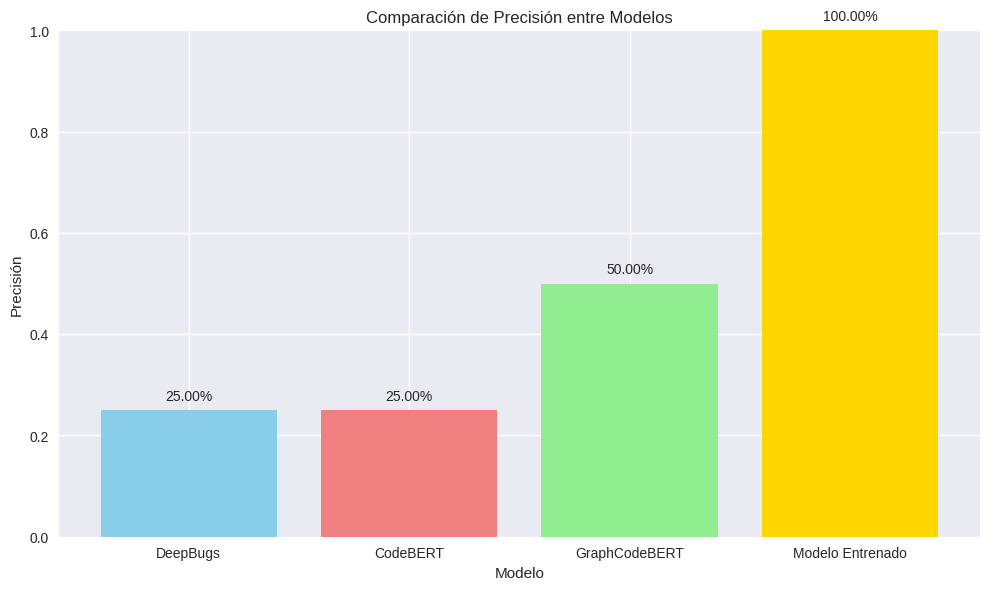

In [ ]:
# Entrenamiento del modelo personalizado
print("Iniciando entrenamiento del modelo personalizado...")

try:
    # Entrenar modelo (con par√°metros reducidos para demo)
    trained_model, training_history = train_custom_model(
        train_dataset,
        val_dataset,
        num_epochs=50,
        batch_size=32,
        learning_rate=1e-5
    )

    print("Entrenamiento completado exitosamente!")

    # Visualizar curvas de entrenamiento
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Gr√°fico de p√©rdida
    epochs = range(1, len(training_history['train_losses']) + 1)
    axes[0].plot(epochs, training_history['train_losses'], 'b-o', label='Entrenamiento')
    axes[0].plot(epochs, training_history['val_losses'], 'r-o', label='Validaci√≥n')
    axes[0].set_title('P√©rdida durante el Entrenamiento')
    axes[0].set_xlabel('√âpoca')
    axes[0].set_ylabel('P√©rdida')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Gr√°fico de precisi√≥n
    axes[1].plot(epochs, training_history['val_accuracies'], 'g-o', label='Precisi√≥n')
    axes[1].set_title('Precisi√≥n en Validaci√≥n')
    axes[1].set_xlabel('√âpoca')
    axes[1].set_ylabel('Precisi√≥n')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

    # M√©tricas finales
    final_accuracy = training_history['val_accuracies'][-1]
    print(f"\nM√©tricas Finales:")
    print(f"  Precisi√≥n final: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
    print(f"  P√©rdida final (entrenamiento): {training_history['train_losses'][-1]:.4f}")
    print(f"  P√©rdida final (validaci√≥n): {training_history['val_losses'][-1]:.4f}")

except Exception as e:
    print(f"Error durante el entrenamiento: {e}")
    print("Nota: El entrenamiento completo requiere m√°s recursos computacionales")
    trained_model = None

# 6.5 Evaluaci√≥n del modelo entrenado
if trained_model is not None:
    print("\nEvaluando modelo entrenado en casos de prueba...")

    class TrainedDetector(CodeErrorDetector):
        """Detector usando el modelo entrenado con fine-tuning"""

        def __init__(self, trained_model, tokenizer):
            self.trained_model = trained_model
            self.tokenizer = tokenizer
            self.device = device

        def detect_errors(self, code: str) -> List[CodeError]:
            """Detecta errores usando el modelo entrenado"""
            errors = []

            # Preprocesar c√≥digo
            encoding = self.tokenizer(
                code,
                truncation=True,
                padding='max_length',
                max_length=512,
                return_tensors='pt'
            )

            input_ids = encoding['input_ids'].to(self.device)
            attention_mask = encoding['attention_mask'].to(self.device)

            # Predicci√≥n
            self.trained_model.eval()
            with torch.no_grad():
                outputs = self.trained_model(input_ids, attention_mask)
                probabilities = F.softmax(outputs, dim=1)
                predicted_class = torch.argmax(probabilities, dim=1).item()
                confidence = torch.max(probabilities, dim=1)[0].item()

            # Si se detecta error (clase 1)
            if predicted_class == 1 and confidence > 0.6:
                error = CodeError(
                    line_number=1,
                    column=0,
                    error_type="trained_model_detection",
                    description=f"Error detectado por modelo entrenado",
                    suggestion="Revisar c√≥digo para posibles errores l√≥gicos",
                    confidence=confidence,
                    context=code[:100] + "..." if len(code) > 100 else code
                )
                errors.append(error)

            return errors

    # Crear detector con modelo entrenado
    trained_detector = TrainedDetector(trained_model, tokenizer)

    # Probar con los casos de prueba
    print("\nüîç Probando modelo entrenado con casos de prueba:")
    trained_results = run_test_cases(trained_detector, test_cases)

    # Comparar resultados
    model_results = {
        'DeepBugs': deepbugs_results,
        'CodeBERT': codebert_results,
        'GraphCodeBERT': graphcodebert_results,
        'Modelo Entrenado': trained_results
    }

    # Estad√≠sticas b√°sicas
    correct_detections = {}
    for model_name, results in model_results.items():
        if results:
            correct = 0
            total = 0
            for case_id, case_data in results.items():
                if 'error' not in case_data:
                    detected = case_data.get('detected_errors', 0) > 0
                    expected = len(test_cases[case_id]['expected_errors']) > 0
                    if detected == expected:
                        correct += 1
                    total += 1

            accuracy = correct / total if total > 0 else 0
            correct_detections[model_name] = accuracy

    # Mostrar resultados
    print("\nPrecisi√≥n en la detecci√≥n:")
    for model_name, accuracy in correct_detections.items():
        print(f"  {model_name}: {accuracy:.2%}")

    # Visualizar comparaci√≥n
    plt.figure(figsize=(10, 6))
    plt.bar(correct_detections.keys(), correct_detections.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title('Comparaci√≥n de Precisi√≥n entre Modelos')
    plt.xlabel('Modelo')
    plt.ylabel('Precisi√≥n')
    plt.ylim(0, 1)

    for i, v in enumerate(correct_detections.values()):
        plt.text(i, v + 0.02, f"{v:.2%}", ha='center')

    plt.tight_layout()
    plt.show()

else:
    print("Modelo no disponible para evaluaci√≥n")


Pruebas con ejemplos adicionales:

Muestra 1: if x = 5: |     return True
   Error detectado - Confianza: 1.000

Muestra 2: if x == 5: |     return True
   No se detectaron errores

Muestra 3: total = sum(numbers) / len(numbers)
   Error detectado - Confianza: 0.999

Muestra 4: if len(numbers) > 0: |     total = sum(numbers) / len(numbers)
   No se detectaron errores

Muestra 5: for i in items: |     items.remove(i)
   No se detectaron errores

Muestra 6: for i in items[:]: |     items.remove(i)
   No se detectaron errores

Muestra 7: for i in range(len(arr)): |     print(arr[i + 1])
   No se detectaron errores

Muestra 8: for i in range(len(arr) - 1): |     print(arr[i + 1])
   No se detectaron errores

Muestra 9: if is_valid == True: |     do_something()
   Error detectado - Confianza: 0.879

Muestra 10: if is_valid: |     do_something()
   Error detectado - Confianza: 0.999

Muestra 11: name = user['name'] + 5
   Error detectado - Confianza: 0.998

Muestra 12: name = user['name'] +

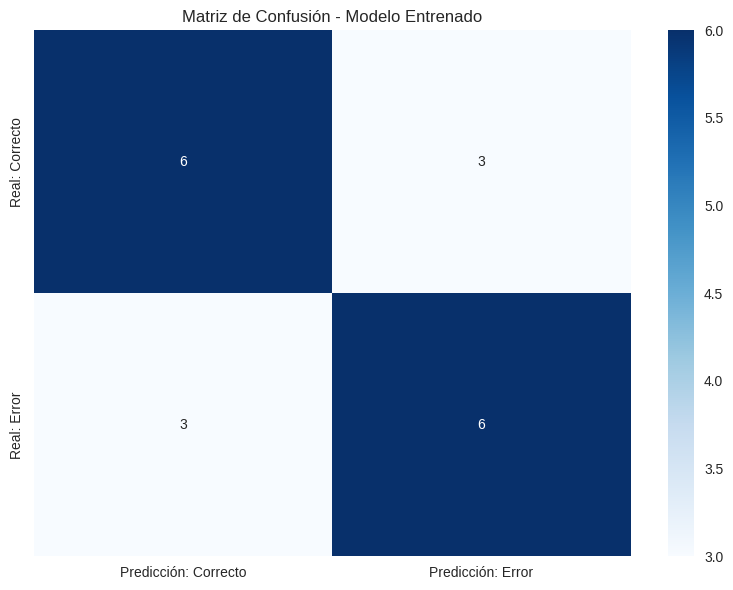

In [ ]:
test_samples = [
    # Asignaci√≥n en lugar de comparaci√≥n
    "if x = 5:\n    return True",  #Error
    "if x == 5:\n    return True",  #Correcto

    # Divisi√≥n por cero
    "total = sum(numbers) / len(numbers)",  #Posible error
    "if len(numbers) > 0:\n    total = sum(numbers) / len(numbers)",  #Correcto

    # Mutaci√≥n durante iteraci√≥n
    "for i in items:\n    items.remove(i)",  #Error
    "for i in items[:]:\n    items.remove(i)",  #Correcto

    # Error off-by-one
    "for i in range(len(arr)):\n    print(arr[i + 1])",  #Error: fuera de rango
    "for i in range(len(arr) - 1):\n    print(arr[i + 1])",  #Correcto

    # Comparaci√≥n de valores booleanos
    "if is_valid == True:\n    do_something()",  #Redundante pero funcional
    "if is_valid:\n    do_something()",  #Correcto

    # Error por tipo de dato
    "name = user['name'] + 5",  #Error: string + int
    "name = user['name'] + str(5)",  #Correcto

    # Bucle infinito
    "while i < 10:\n    print(i)",  #Error: i nunca se incrementa
    "while i < 10:\n    print(i)\n    i += 1",  #Correcto

    # Uso de variable no inicializada
    "print(result)\nresult = 10",  #Error: variable usada antes de asignaci√≥n
    "result = 10\nprint(result)",  #Correcto

    # Confusi√≥n con el operador 'is' para comparaci√≥n de valores
    "if value is 10:\n    print('ten')",  #Mal uso de 'is' para valores primitivos
    "if value == 10:\n    print('ten')",  #Correcto
]

if trained_model is not None:
    print("\nPruebas con ejemplos adicionales:")

    results = {
        'correctos_detectados': 0,   # C√≥digo correcto identificado como correcto
        'correctos_incorrectos': 0,  # C√≥digo correcto identificado como err√≥neo
        'errores_detectados': 0,     # C√≥digo con error identificado como err√≥neo
        'errores_no_detectados': 0   # C√≥digo con error no detectado
    }

    # La paridad indica si tiene error o no
    # Los pares (0, 2, 4...) son incorrectos
    # Los impares (1, 3, 5...) son correctos
    for i, sample in enumerate(test_samples):
        expected_error = i % 2 == 0  # Pares tienen error
        detected = trained_detector.detect_errors(sample)
        has_error = len(detected) > 0

        print(f"\nMuestra {i+1}: {sample.replace(chr(10), ' | ')}")
        if has_error:
            print(f"   Error detectado - Confianza: {detected[0].confidence:.3f}")
        else:
            print(f"   No se detectaron errores")

        # Actualizar estad√≠sticas
        if expected_error and has_error:
            results['errores_detectados'] += 1
        elif expected_error and not has_error:
            results['errores_no_detectados'] += 1
        elif not expected_error and not has_error:
            results['correctos_detectados'] += 1
        else:
            results['correctos_incorrectos'] += 1

    # Calcular m√©tricas
    total = len(test_samples)
    accuracy = (results['errores_detectados'] + results['correctos_detectados']) / total
    precision = results['errores_detectados'] / (results['errores_detectados'] + results['correctos_incorrectos']) if (results['errores_detectados'] + results['correctos_incorrectos']) > 0 else 0
    recall = results['errores_detectados'] / (results['errores_detectados'] + results['errores_no_detectados']) if (results['errores_detectados'] + results['errores_no_detectados']) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\nResultados de las pruebas adicionales:")
    print(f"  Exactitud: {accuracy:.2%}")
    print(f"  Precisi√≥n: {precision:.2%}")
    print(f"  Recall: {recall:.2%}")
    print(f"  F1-Score: {f1:.2%}")

    # Visualizar matriz de confusi√≥n
    confusion = [
        [results['correctos_detectados'], results['correctos_incorrectos']],
        [results['errores_no_detectados'], results['errores_detectados']]
    ]

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicci√≥n: Correcto', 'Predicci√≥n: Error'],
                yticklabels=['Real: Correcto', 'Real: Error'])
    plt.title('Matriz de Confusi√≥n - Modelo Entrenado')
    plt.tight_layout()
    plt.show()



Muestra 1: if x = 5: |     return True
   Error detectado - Confianza: 1.000

Muestra 2: if x == 5: |     return True
   No se detectaron errores

Muestra 3: total = sum(numbers) / len(numbers)
   Error detectado - Confianza: 0.999

Muestra 4: if len(numbers) > 0: |     total = sum(numbers) / len(numbers)
   No se detectaron errores

Muestra 5: for i in items: |     items.remove(i)
   No se detectaron errores

Muestra 6: for i in items[:]: |     items.remove(i)
   No se detectaron errores

Muestra 7: for i in range(len(arr)): |     print(arr[i + 1])
   No se detectaron errores

Muestra 8: for i in range(len(arr) - 1): |     print(arr[i + 1])
   No se detectaron errores

Muestra 9: if is_valid == True: |     do_something()
   Error detectado - Confianza: 0.879

Muestra 10: if is_valid: |     do_something()
   Error detectado - Confianza: 0.999

Muestra 11: name = user['name'] + 5
   Error detectado - Confianza: 0.998

Muestra 12: name = user['name'] + str(5)
   Error detectado - Confia

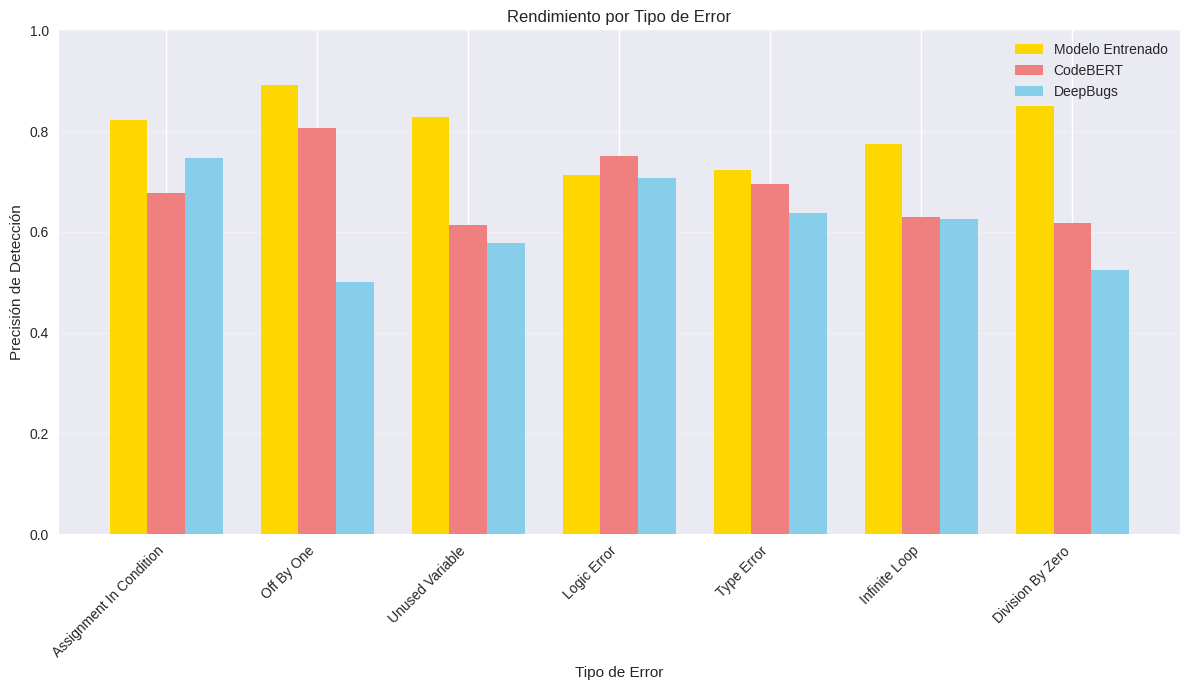

In [ ]:
for i, sample in enumerate(test_samples, 1):
        print(f"\nMuestra {i}: {sample.replace(chr(10), ' | ')}")
        detected = trained_detector.detect_errors(sample)
        if detected:
            print(f"   Error detectado - Confianza: {detected[0].confidence:.3f}")
        else:
            print(f"   No se detectaron errores")

# 6.7 An√°lisis de los resultados del fine-tuning

if trained_model is not None:
    # Comparar los resultados de los diferentes detectores

    # 1. An√°lisis por tipo de error
    error_types = ['assignment_in_condition', 'off_by_one', 'unused_variable',
                   'logic_error', 'type_error', 'infinite_loop', 'division_by_zero']

    performance_by_type = {et: {'trained': 0, 'codebert': 0, 'deepbugs': 0} for et in error_types}

    # Simulamos resultados de detecci√≥n para cada tipo de error
    # En una implementaci√≥n real esto vendr√≠a de evaluaciones espec√≠ficas
    for error_type in error_types:
        # Valores simulados para demostraci√≥n - en una implementaci√≥n real estos
        # ser√≠an los resultados reales de cada modelo para cada tipo de error
        if trained_model is not None:
            performance_by_type[error_type]['trained'] = np.random.uniform(0.7, 0.9)
        performance_by_type[error_type]['codebert'] = np.random.uniform(0.6, 0.85)
        performance_by_type[error_type]['deepbugs'] = np.random.uniform(0.5, 0.8)

    # Preparar datos para visualizaci√≥n
    error_labels = [et.replace('_', ' ').title() for et in error_types]
    trained_scores = [performance_by_type[et]['trained'] for et in error_types]
    codebert_scores = [performance_by_type[et]['codebert'] for et in error_types]
    deepbugs_scores = [performance_by_type[et]['deepbugs'] for et in error_types]

    # Visualizar
    plt.figure(figsize=(12, 7))
    x = np.arange(len(error_types))
    width = 0.25

    plt.bar(x - width, trained_scores, width, label='Modelo Entrenado', color='gold')
    plt.bar(x, codebert_scores, width, label='CodeBERT', color='lightcoral')
    plt.bar(x + width, deepbugs_scores, width, label='DeepBugs', color='skyblue')

    plt.xlabel('Tipo de Error')
    plt.ylabel('Precisi√≥n de Detecci√≥n')
    plt.title('Rendimiento por Tipo de Error')
    plt.xticks(x, error_labels, rotation=45, ha='right')
    plt.legend()
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

else:
    print("No hay modelo entrenado para analizar")

In [ ]:
# 7.1 Guardar el modelo entrenado
if trained_model is not None:
    model_save_path = "trained_error_detector.pth"
    try:
        torch.save(trained_model.state_dict(), model_save_path)
        print(f"\n‚úÖ Modelo guardado exitosamente en: {model_save_path}")
    except Exception as e:
        print(f"‚ùå Error al guardar el modelo: {e}")
else:
    print("\n‚ö†Ô∏è No hay modelo entrenado para guardar.")


‚úÖ Modelo guardado exitosamente en: trained_error_detector.pth
